# Chapter 2 

# 15 years and to be prolonged 10-30 meters consistent uncertainty quantified global analysis ready dataset

Feng Yin  
Department of Geography, UCL  
ucfafyi@ucl.ac.uk  

In this Chapter, I will introduce the [SIAC](https://github.com/MarcYin/Atmospheric_correction) (Sensor Invariant Atmospheric Correction) developed under the European Union’s Horizon 2020 [MULTIPLY](http://www.multiply-h2020.eu/) project can be used to generate global **uncertainty quantified analysis ready datasets** after 2003, which covered by NASA [Landsat](https://landsat.usgs.gov) 5-8 missions and ESA [Senitinel 2](https://www.esa.int/Our_Activities/Observing_the_Earth/Copernicus/Sentinel-2) mission. 


First I will give a simple introductions of the SIAC method and then I will test SIAC method for several Landsat and Sentinel 2 images to illustrate its usage with various sensors. The validation of SIAC method are done for Sentinel 2 and Landsat 8 images and a [map](http://www2.geog.ucl.ac.uk/~ucfafyi/map/) showing the AOT validation againsts the AERONET measurements across the worldm, also the top of atmosphere (TOA) reflectance and bottom of atmosphere (BOA) are displayed for each validation site. Further validation of other Landsat sensors AC will be done in the following studies, so in this chapter the major purpose is to demonstrate the applicability of SIAC method for different sensors.

### SIAC

This atmospheric correction method uses MODIS MCD43 BRDF product to get a coarse resolution simulation of earth surface. A model based on MODIS PSF is built to deal with the scale differences between MODIS and other sensors, and linear spectral mapping is used to map between different sensors spectrally. We uses the ECMWF [CAMS](http://apps.ecmwf.int/datasets/data/cams-nrealtime/levtype=sfc/) prediction as a prior for the atmospheric states, coupling with 6S model to solve for the atmospheric parameters, then the solved atmospheric parameters are used to correct the TOA reflectances. The whole system is built under Bayesian theory and the uncertainty is propagated through the whole system. Since we do not rely on specific bands' relationship to estimate the atmospheric states, but instead a more generic and consistent way of inversion those parameters. The code can be downloaded from [SIAC](https://github.com/MarcYin/Atmospheric_correction) github directly and futrher updates will make it more independent and can be installed on different machines.

#### Inputs:


* MCD43: 16 days before and 16 days after the sensing date
* ECMWF CAMS [Near Real Time](http://apps.ecmwf.int/datasets/data/cams-nrealtime/levtype=sfc/) prediction or MACC [reanalysis](http://apps.ecmwf.int/datasets/data/macc-reanalysis/levtype=sfc/): a time step of 3 hours with the start time of 00:00:00 over the date and a easier access option is hosted at http://www2.geog.ucl.ac.uk/~ucfafyi/cams/ but only after 01/04/2015, when Sentinel 2A was just lucnched.
* Global dem: Global DEM VRT file built from ASTGTM2 DEM, and a bash script under eles/ can be used to generate with the individual files, and here we use [ASTER Global Digital Elevation Model V002](https://asterweb.jpl.nasa.gov/gdem.asp) and a easier option of accessing the dataset with [gdal vertual file system](https://www.gdal.org/gdal_virtual_file_systems.html) is hosted at http://www2.geog.ucl.ac.uk/~ucfafyi/eles/global_dem.vrt.
* Emulators: emulators for the 6S for different senros, can be found at: http://www2.geog.ucl.ac.uk/~ucfafyi/emus/


#### Outputs:

The outputs are the corrected BOA images saved as `B0*_sur.tif` for each band and uncertainty `B0*_sur_unc.tif`. `TOA_RGB.tif` and `BOA_RGB.tif` are generated for a visual check of correction results. They are all under the same folder as the TOA images.

#### Data access:

***[MCD43](https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mcd43a1_v006): ***

The MODIS MCD43A1 Version 6 Bidirectional reflectance distribution function and Albedo (BRDF/Albedo) Model Parameters data set is a 500 meter daily 16-day product. The Julian date in the granule ID of each specific file represents the 9th day of the 16 day retrieval period, and consequently the observations are weighted to estimate the BRDF/Albedo for that day. The MCD43A1 algorithm, as is with all combined products, has the luxury of choosing the best representative pixel from a pool that includes all the acquisitions from both the Terra and Aqua sensors from the retrieval period.
The MCD43A1 provides the three model weighting parameters (isotropic, volumetric, and geometric) for each of the MODIS bands 1 through 7 and the visible (vis), near infrared (nir), and shortwave bands used to derive the Albedo and BRDF products (MCD43A3 and MCD43A4). Along with the 3 dimensional parameter layers for these bands are the Mandatory Quality layers for each of the 10 bands. The MODIS BRDF/ALBEDO products have achieved stage 3 validation. (From the website)

We use the BRDF descriptors inverted from MODIS high temporal multi-angular observations to get simulation of surface reflectance by using the Landsat or Sentinel 2 scanning geometry, and the reason of using 32 days MCD43 is due to the gaps in the current MCD43 products which cause issues for the inversion of reliable atmospheric paraneters. This dataset has to be downloaded from the [NASA Data Pool](https://lpdaac.usgs.gov/data_access/data_pool) with username and passoword registered at [EARTHDATA LOGIN](https://urs.earthdata.nasa.gov/). The function `get_MCD43.py` inside `util` can be used for a easier acess to the data, but remember to change the username and passoword in the `util/earthdata_auth` file:

In [1]:
!cat util/earthdata_auth

username
password


In [2]:
import sys
sys.path.insert(0, 'util')
from get_MCD43 import get_mcd43, find_files
from datetime import datetime

In [3]:
# the great gdal virtual file system and google cloud landsat public datasets
google_cloud_base = '/vsicurl/https://storage.googleapis.com/gcp-public-data-landsat/'
aoi = google_cloud_base + 'LE07/01/202/034/LE07_L1TP_202034_20060611_20170108_01_T1/LE07_L1TP_202034_20060611_20170108_01_T1_B1.TIF'
obs_time = datetime(2006, 6, 11)
# based on time and aoi find the MCD43 
# within 16 days temporal window
ret = find_files(aoi, obs_time, temporal_window = 16)
for i in ret:
    print(i)

https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.05.26/MCD43A1.A2006146.h17v05.006.2016102175833.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.05.27/MCD43A1.A2006147.h17v05.006.2016102184226.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.05.28/MCD43A1.A2006148.h17v05.006.2016102192740.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.05.29/MCD43A1.A2006149.h17v05.006.2016102201522.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.05.30/MCD43A1.A2006150.h17v05.006.2016102210019.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.05.31/MCD43A1.A2006151.h17v05.006.2016102215923.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.06.01/MCD43A1.A2006152.h17v05.006.2016102223051.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.06.02/MCD43A1.A2006153.h17v05.006.2016102225753.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.06.03/MCD43A1.A2006154.h17v05.006.2016102232936.hdf
https://e4ftl01.cr.usgs.gov/MOTA/MCD43A1.006/2006.06.04/MCD43A1.A2006155.h17v05.00

To download them and used them and creat a daily global VRT file:

In [4]:
get_mcd43(aoi, obs_time, mcd43_dir = './MCD43/', vrt_dir = './MCD43_VRT')

In [5]:
ls ./MCD43/ ./MCD43_VRT/ ./MCD43_VRT/2006-05-27/*.vrt

./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_Band1.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_Band2.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_Band3.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_Band4.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_Band5.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_Band6.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_Band7.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_nir.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_shortwave.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Band_Mandatory_Quality_vis.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Parameters_Band1.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Parameters_Band2.vrt
./MCD43_VRT/2006-05-27/MCD43_2006147_BRD

In [6]:
!gdalinfo ./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Parameters_Band5.vrt

Driver: VRT/Virtual Raster
Files: ./MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Parameters_Band5.vrt
Size is 2400, 2400
Coordinate System is:
PROJCS["unnamed",
    GEOGCS["Unknown datum based upon the custom spheroid",
        DATUM["Not specified (based on custom spheroid)",
            SPHEROID["Custom spheroid",6371007.181,0]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Sinusoidal"],
    PARAMETER["longitude_of_center",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]
Origin = (-1111950.519667000044137,4447802.078666999936104)
Pixel Size = (463.312716527916677,-463.312716527916677)
Corner Coordinates:
Upper Left  (-1111950.520, 4447802.079) ( 13d 3'14.66"W, 40d 0' 0.00"N)
Lower Left  (-1111950.520, 3335851.559) ( 11d32'49.22"W, 30d 0' 0.00"N)
Upper Right (       0.000, 4447802.079) (  0d 0' 0.01"E, 40d 0' 0.00"N)
Lower Right (       0.000, 3335851.559) (  0d 0' 0.01"E, 30d 0' 0.00"N)
Cente

The great part of creat VRT files is that virtual global mosaic of MCD43 for different parameters and different times are created with a very small fraction of storage space, but eliminate a lot of troubles in dealing with different spatial resolutions, data formats and multi-tile coverage... Actually, the best way of store the datasets is turn it into [Cloud optimized GeoTIFF](https://trac.osgeo.org/gdal/wiki/CloudOptimizedGeoTIFF), which enables access of chuncks of data from a virtul mosaic to be possible and saves a lot of unnecessary downloading of data outside the area of interest. And this can be done easily with gdal as well:

```python
#!/usr/bin/env python                                                                     
import os
import sys
import gdal
from datetime import datetime
#fname = sys.argv[1]
try:
    g =  gdal.Open(fname)
except:
    raise IOError('File cannot opened!')
subs = [i[0] for i in g.GetSubDatasets()]
 
def translate(sub):
    ret = sub.split(':')
    fname, para = ret[2].split('"')[1], ret[-1]
    ret = fname.split('.')
    day = datetime.strptime(ret[-5].split('A')[1], '%Y%j').strftime('%Y_%m_%d')
    fname =  '_'.join(ret[:-2]) + '_%s.tif'%para
    fname =  day+ '/' + fname
    if os.path.exists(fname):
        pass
    else:
        if os.path.exists('./%s'%day):
            pass
        else:
           os.mkdir('./%s'%day)
        gdal.Translate(fname, sub,creationOptions=["TILED=YES", "COMPRESS=DEFLATE"])
for sub in subs:
    translate(sub)
 ```

In [7]:
#!/usr/bin/env python                                                                     
import os
import sys
import gdal
from datetime import datetime
fname = './MCD43/MCD43A1.A2006146.h17v05.006.2016102175833.hdf'
try:
    g =  gdal.Open(fname)
except:
    raise IOError('File cannot opened!')
subs = [i[0] for i in g.GetSubDatasets()]

def translate(sub):
    ret = sub.split(':')
    path, para = ret[2].split('"')[1], ret[-1]
    base = '/'.join(path.split('/')[:-1])
    fname = path.split('/')[-1]
    day = datetime.strptime(fname.split('.')[1].split('A')[1], '%Y%j').strftime('%Y_%m_%d')
    ret = fname.split('.')
    day = datetime.strptime(ret[-5].split('A')[1], '%Y%j').strftime('%Y_%m_%d')
    fname =  '_'.join(ret[:-2]) + '_%s.tif'%para
    fname = base + '/' + day + '/' + fname
    if os.path.exists(fname):
        pass
    else:
        if os.path.exists(base + '/%s'%day):
            pass
        else:
           os.mkdir(base + '/%s'%day)
        gdal.Translate(fname, sub,creationOptions=["TILED=YES", "COMPRESS=DEFLATE"])
for sub in subs:
    translate(sub)

In [8]:
ls MCD43/2006_05_26/

MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_Band1.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_Band2.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_Band3.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_Band4.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_Band5.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_Band6.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_Band7.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_nir.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_shortwave.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Band_Mandatory_Quality_vis.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Parameters_Band1.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Parameters_Band1.tif.aux.xml
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Parameters_Band2.tif
MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Parameters_Band2.tif.aux.xml
MCD43A1_A2

So we basically converted the MODIS HDF format into GeoTiff format and an important argument for the `gdal.translate` is `TILED=YES` which will make small chunk access of dataset to be possible.

<IPython.core.display.Javascript object>


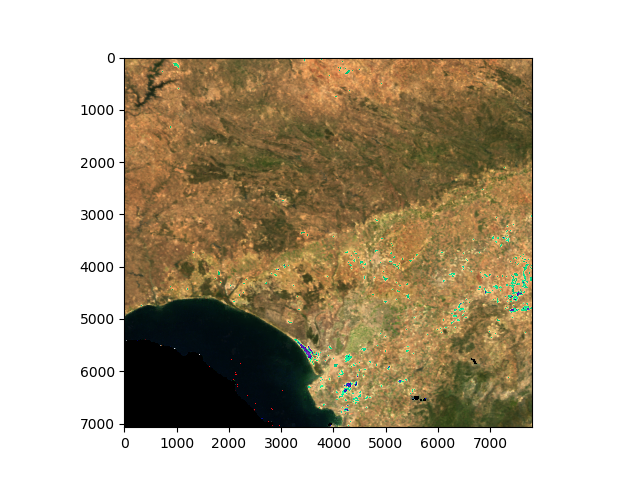

In [22]:
import pylab as plt
import numpy as np
%matplotlib notebook
from reproject import reproject_data
# hear we try to reproject the RGB band
# from MCD43 to the aoi used above, whcih
# is just a url to the google cloud file
# we also use the vrt file we created 
# as our source file and reproject them 
# to the aoi with the same spatial resol.
source = './MCD43_VRT/2006-05-27/MCD43_2006147_BRDF_Albedo_Parameters_Band1.vrt'

r = reproject_data(source, aoi).data[0] * 0.001
g = reproject_data(source.replace('Band1', 'Band4'), aoi).data[0] * 0.001
b = reproject_data(source.replace('Band1', 'Band3'), aoi).data[0] * 0.001

r[r>1]=np.nan
b[b>1] = np.nan
g[g>1] = np.nan
plt.imshow(np.array([r,g,b]).transpose(1,2,0)*4)

I have also put the created tif file into the UCL geography file server at http://www2.geog.ucl.ac.uk/~ucfafyi/test_files/2006_05_26/

In [10]:
from IPython.core.display import HTML
#HTML("http://www2.geog.ucl.ac.uk/~ucfafyi/test_files/2006_05_26/")

And if we change from the VRT file to the url to the tif files, it will also works!!!

<IPython.core.display.Javascript object>


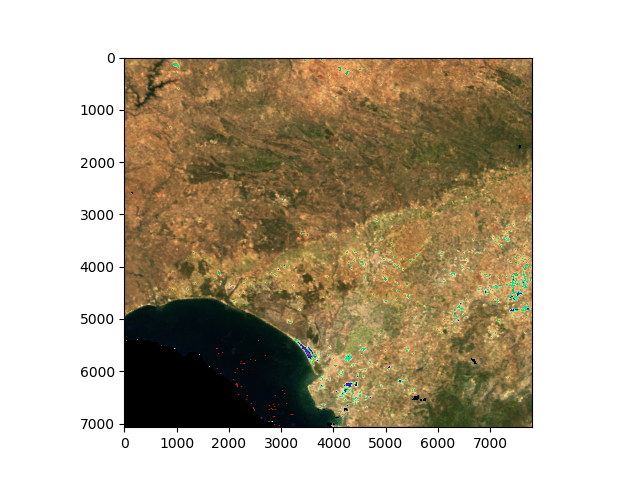

In [16]:
%matplotlib notebook
url = '/vsicurl/http://www2.geog.ucl.ac.uk/~ucfafyi/test_files/2006_05_26/'
source = url + 'MCD43A1_A2006146_h17v05_006_BRDF_Albedo_Parameters_Band1.tif'

r = reproject_data(source, aoi).data[0] * 0.001
g = reproject_data(source.replace('Band1', 'Band4'), aoi).data[0] * 0.001
b = reproject_data(source.replace('Band1', 'Band3'), aoi).data[0] * 0.001

r[r>1]=np.nan
b[b>1] = np.nan
g[g>1] = np.nan
plt.imshow(np.array([r,g,b]).transpose(1,2,0)*4)

And if we creat virtual global mosaic VRT file with those GeoTiff images, we can also access them with gdal and do the subset and reprojection easily....And I will demonstrate it with the ASTGTM2 DEM...

***Global DEM***

I have downloaded most of the DEM images from NASA server and put them in the UCL server at: http://www2.geog.ucl.ac.uk/~ucfafyi/eles/ and a global DEM VRT file is generated with:
```bash
ls *.tif>file_list.txt                                         
gdalbuildvrt -te -180 -90 180 90 global_dem.vrt -input_file_list file_list.txt
```


In [12]:
print(gdal.Info('/vsicurl/http://www2.geog.ucl.ac.uk/~ucfafyi/eles/global_dem.vrt',showFileList=False))

Driver: VRT/Virtual Raster
Files: /vsicurl/http://www2.geog.ucl.ac.uk/~ucfafyi/eles/global_dem.vrt
Size is 1296000, 648000
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-180.000000000000000,90.000000000000000)
Pixel Size = (0.000277777777778,-0.000277777777778)
Corner Coordinates:
Upper Left  (-180.0000000,  90.0000000) (180d 0' 0.00"W, 90d 0' 0.00"N)
Lower Left  (-180.0000000, -90.0000000) (180d 0' 0.00"W, 90d 0' 0.00"S)
Upper Right ( 180.0000000,  90.0000000) (180d 0' 0.00"E, 90d 0' 0.00"N)
Lower Right ( 180.0000000, -90.0000000) (180d 0' 0.00"E, 90d 0' 0.00"S)
Center      (   0.0000000,  -0.0000000) (  0d 0' 0.00"E,  0d 0' 0.00"S)
Band 1 Block=128x128 Type=Int16, ColorInterp=Gray



<IPython.core.display.Javascript object>


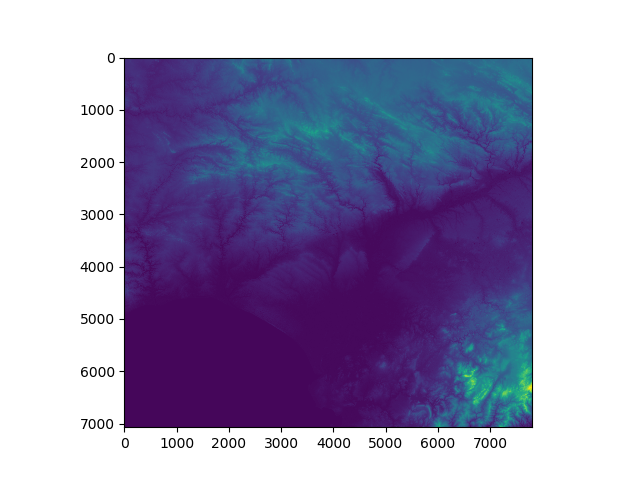

In [17]:
%matplotlib notebook
source = '/vsicurl/http://www2.geog.ucl.ac.uk/~ucfafyi/eles/global_dem.vrt'
ele = reproject_data(source, aoi).data * 0.001
plt.imshow(ele)

Instantly, we get the DEM with the same resolution and geographic coverage as the aoi, which means if we have the MCD43 in GeoTiff format and a global mosaic can be created for each day then the access of MCD43 data will be much easier, and this actully applies to all different kind of GIS datasets.

***CAMS atmospheric composition data***

As part of the European Copernicus programme on environmental monitoring, greenhouse gases, aerosols, and chemical species have been introduced in the ECMWF model allowing assimilation and forecasting of atmospheric composition. At the same time, the added atmospheric composition variables are being used to improve the Numerical Weather Prediction (NWP) system itself, most notably through the interaction with the radiation scheme and the use in observation operators for satellite radiance assimilation. (from the [website](https://www.ecmwf.int/en/research/modelling-and-prediction/atmospheric-composition))

In SIAC, the aerosol optical thickness (AOT) at 550$nm$, total column of water vapour (TCWV) and total column of Ozone(TCO$_3$) are used as priors for the atmospheric states. The data can be aquired through the official pages, but it needs to wait for the queue to process each time you request it, but actually the dataset is at a coarse grid and only take small storage space and again daily global mosaic for each parameter in tif format at UCL server at http://www2.geog.ucl.ac.uk/~ucfafyi/cams/. There is no need to process it for each user and do the subset each time....

The api access to cams near real time:

```python
#!/usr/bin/env python
import os    
import sys   
import gdal  
from glob import glob
from ecmwfapi import ECMWFDataServer
server = ECMWFDataServer()
from datetime import datetime, timedelta
para_names = 'tcwv,gtco3,aod550,duaod550,omaod550,bcaod550,suaod550'.split(',')
this_date = datetime(2015,4,26)
filename = "%s.nc"%this_date
if not os.path.exists(filename):
    server.retrieve({
        "class": "mc",
        "dataset": "cams_nrealtime",
        "date": "%s"%this_date,
        "expver": "0001",
        "levtype": "sfc",
        "param": "137.128/206.210/207.210/209.210/210.210/211.210/212.210",
        "step": "0/3/6/9/12/15/18/21/24",
        "stream": "oper",
        "time": "00:00:00",
        "type": "fc",
        "grid": "0.125/0.125",
        "area": "90/-180/-90/180", 
        "format":"netcdf",
        "target": "%s.nc"%this_date,
    })   
else:    
    pass 
header = '_'.join(filename.split('.')[0].split('-'))
if not os.path.exists(header):
    os.mkdir(header)
exists = glob(header+'/*.tif')
if len(sys.argv[2:])>0:
    list_para = sys.argv[2:]
else:    
    list_para = para_names
temp = 'NETCDF:"%s":%s'
for i in list_para:
    if header + '/'+header+'_'+i+'.tif' not in exists:
        t = 'Translating %-31s to %-23s'%(temp%(filename,i), header+'_'+i+'.tif')
        print(t)
        gdal.Translate(header + '/'+header+'_'+i+'.tif', temp%(filename,i), outputSRS='EPSG:4326', creationOptions=["TILED=YES", "COMPRESS=DEFLATE"])
```
and reanalysis data:

```python
#!/usr/bin/env python
import os    
import sys   
import gdal  
from glob import glob
from ecmwfapi import ECMWFDataServer
server = ECMWFDataServer()
from datetime import datetime, timedelta
para_names = 'tcwv,gtco3,aod550,duaod550,omaod550,bcaod550,suaod550'.split(',')
this_date = datetime(2012,4,26)
filename = "%s.nc"%this_date
if not os.path.exists(filename):
    server.retrieve({
        "class": "mc",
        "dataset": "macc",
        "date": "%s"%this_date,
        "expver": "rean",
        "levtype": "sfc",
        "param": "137.128/206.210/207.210/209.210/210.210/211.210/212.210",
        "step": "0/3/6/9/12/15/18/21/24",
        "stream": "oper",
        "time": "00:00:00",
        "type": "fc",
        "grid": "0.125/0.125",
        "area": "90/-180/-90/180",                                              
        "format":"netcdf",
        "target": "%s.nc"%this_date,
    })   
else:    
    pass 
header = '_'.join(filename.split('.')[0].split('-'))
if not os.path.exists(header):
    os.mkdir(header)
exists = glob(header+'/*.tif')
if len(sys.argv[2:])>0:
    list_para = sys.argv[2:]
else:    
    list_para = para_names
temp = 'NETCDF:"%s":%s'
for i in list_para:
    if header + '/'+header+'_'+i+'.tif' not in exists:
        t = 'Translating %-31s to %-23s'%(temp%(filename,i), header+'_'+i+'.tif')
        print(t)
        gdal.Translate(header + '/'+header+'_'+i+'.tif', temp%(filename,i), outputSRS='EPSG:4326', creationOptions=["TILED=YES", "COMPRESS=DEFLATE"])
```

<IPython.core.display.Javascript object>


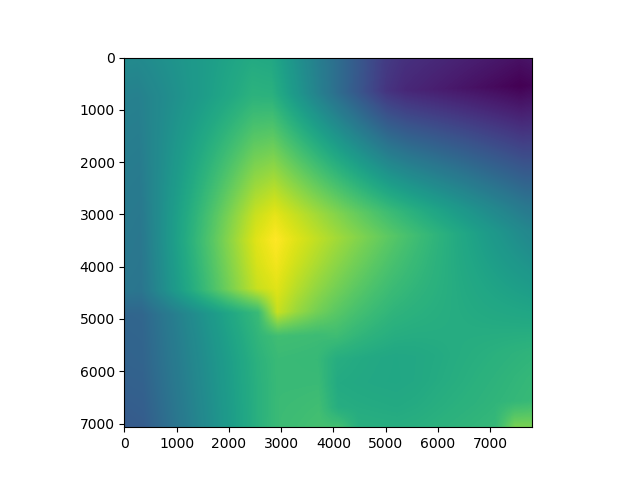

In [21]:
%matplotlib notebook
# here we test with subset of global AOT 550
# over the aoi 
source = '/vsicurl/http://www2.geog.ucl.ac.uk/~ucfafyi/cams/2015_09_08/2015_09_08_aod550.tif'
g = gdal.Open(source)
b1 = g.GetRasterBand(1)
scale, offset = b1.GetScale(), b1.GetOffset()
g = None
g = reproject_data(source, aoi).g
aot = scale * g.GetRasterBand(3).ReadAsArray() + offset
plt.imshow(aot)